In [24]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
path =  'C:\Users\Charlie2\Documents\pubg stat' #"C:\Users\\xruns\Documents\pubgpubgpubg"
filename_sample = path + '\\sample_submission_V2.csv'
filename_test = path + '\\test_V2.csv'
filename_train = path + '\\train_V2.csv'
#test_data = pd.read_csv(filename_test)

In [25]:
filename_train

'C:\\Users\\Charlie2\\Documents\\pubg stat\\train_V2.csv'

In [26]:
train_data= pd.read_csv(filename_train)

In [27]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [29]:
# Let's start validating data by making sure every player placed at the end of the match
# Let's check for a row with a NaN value in that column.
train_data[train_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [30]:
# Dropping that illegal match with only one player from the dataset.
train_data.dropna(subset=['winPlacePerc'], inplace=True)

In [31]:
# Confirming the player is gone.
train_data.iloc[2744604:2744604+1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744605,13521e925ce4ba,763e2f8deb3218,db4c00dd656acb,0,1,24.85,0,0,0,50,...,0,0.0,0,0.0,0,0,1288.0,3,0,0.7917


In [32]:
np.unique(train_data['matchType'])

array(['crashfpp', 'crashtpp', 'duo', 'duo-fpp', 'flarefpp', 'flaretpp',
       'normal-duo', 'normal-duo-fpp', 'normal-solo', 'normal-solo-fpp',
       'normal-squad', 'normal-squad-fpp', 'solo', 'solo-fpp', 'squad',
       'squad-fpp'], dtype=object)

In [33]:
# To make things less complicated, we should only look at standard matches.
# According to the given information, the standard modes are:
# “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”.
# (The -fpp appeneded means the game forced all players to use a "first-person perspective",
# rather, than giving them the option between first-person and third-person to switch between.)
train_data = train_data[(train_data.matchType == 'solo') | (train_data.matchType == 'duo') |
                        (train_data.matchType == 'squad') | (train_data.matchType == 'solo-fpp') |
                        (train_data.matchType == 'duo-fpp') | (train_data.matchType == 'squad-fpp')]
np.unique(train_data['matchType'])

array(['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp'], dtype=object)

In [34]:
# Need to "One hot encode" the matchType feature to 
# perform “binarization” of the category and include it as a feature to train the model.
# This converts the categorical matchType variable into a form that could be provided to 
# ML algorithms to do a better job in prediction.

train_dummy = pd.get_dummies(train_data, columns=['matchType'])

In [35]:
# Taking a look at the encoding.
matchType_encoding = train_dummy.filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_duo-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [36]:
# A game in PUBG can have up to 100 players fighting each other, but most of the times a game isn't "full" at 100. 
# There is no variable that gives us the number of players joined, but it would be good to create one to normalize the data.
train_data['playersJoined'] = train_data.groupby('matchId')['matchId'].transform('count')

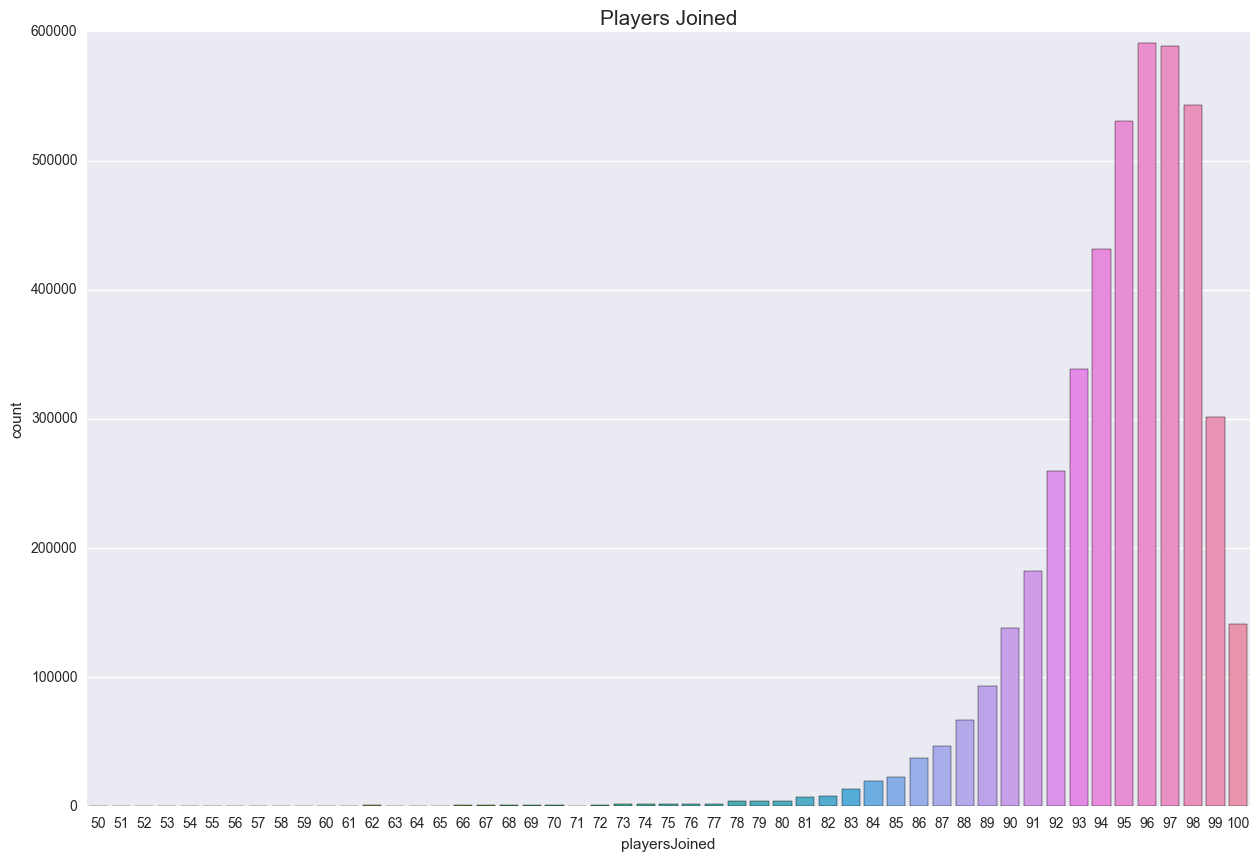

In [38]:
data = train_data.copy()
data = data[data['playersJoined']>49]
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
import seaborn as sns
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

In [39]:
# We need to figure out how to standardize the data, each match has a different number of players,
# so we should normalize other features based on the amount of players.
# Based on the "playersJoined" feature we can create (or change) a lot of others to normalize their values. 
# For example we can, create the "killsNorm" and "damageDealtNorm" features. 
# When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. 
# So we can normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will 
# score (100-90)/100 + 1 = 1.1. This is just an assumption and different scales could be used.

train_data['killsNorm'] = train_data['kills']*((100-train_data['playersJoined'])/100 + 1)
train_data['damageDealtNorm'] = train_data['damageDealt']*((100-train_data['playersJoined'])/100 + 1)
train_data[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


In [40]:
import matplotlib.pyplot as plt
train_dummy = train_data
#train_dummy.groupby(['matchId']).mean()
playerCount = train_dummy.groupby(['matchId']).count()
playerCount = playerCount["Id"].values
n, bins, patches = plt.hist(playerCount, bins=100)
bins

array([   5.  ,    5.95,    6.9 ,    7.85,    8.8 ,    9.75,   10.7 ,
         11.65,   12.6 ,   13.55,   14.5 ,   15.45,   16.4 ,   17.35,
         18.3 ,   19.25,   20.2 ,   21.15,   22.1 ,   23.05,   24.  ,
         24.95,   25.9 ,   26.85,   27.8 ,   28.75,   29.7 ,   30.65,
         31.6 ,   32.55,   33.5 ,   34.45,   35.4 ,   36.35,   37.3 ,
         38.25,   39.2 ,   40.15,   41.1 ,   42.05,   43.  ,   43.95,
         44.9 ,   45.85,   46.8 ,   47.75,   48.7 ,   49.65,   50.6 ,
         51.55,   52.5 ,   53.45,   54.4 ,   55.35,   56.3 ,   57.25,
         58.2 ,   59.15,   60.1 ,   61.05,   62.  ,   62.95,   63.9 ,
         64.85,   65.8 ,   66.75,   67.7 ,   68.65,   69.6 ,   70.55,
         71.5 ,   72.45,   73.4 ,   74.35,   75.3 ,   76.25,   77.2 ,
         78.15,   79.1 ,   80.05,   81.  ,   81.95,   82.9 ,   83.85,
         84.8 ,   85.75,   86.7 ,   87.65,   88.6 ,   89.55,   90.5 ,
         91.45,   92.4 ,   93.35,   94.3 ,   95.25,   96.2 ,   97.15,
         98.1 ,   99

In [41]:
np.mean(playerCount)

93.497891279008158

In [42]:
np.std(playerCount)

9.4728828778592131

In [43]:
np.ma.median(playerCount)

95.0

In [44]:
scaledCount = [0]*len(playerCount)
i = 0
for x in playerCount:
    scaledCount[i] = ((x-np.mean(playerCount))/np.std(playerCount))
    i = i + 1
plt.hist(scaledCount, bins=100)
#Normal standardization probably isn't effective

(array([  1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   6.00000000e+00,
          2.40000000e+01,   3.20000000e+01,   8.50000000e+01,
          1.11000000e+02,   1.23000000e+02,   5.60000000e+01,
          1.10000000e+01,   3.00000000e+00,   3.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   1.20000000e+01,
          1.60000000e+01,   2.40000000e+01,   2.50000000e+01,
          3.90000000e+01,   1.00000000e+01,   7.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          9.00000000e+00,   6.00000000e+00,   9.00000000e+00,
        

In [45]:
np.unique(train_data['numGroups'])

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)